In [2]:

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
"{:.2%}".format(len(pd.json_normalize(fetch_team_schedule_json().get("games", [])).query("gameType == 2 and gameState == 'OFF'"))/82)

'40.24%'

In [26]:
print("Number of Habs games remaining this season per opponent:")

(pd.json_normalize(fetch_team_schedule_json("Canadiens").get('games', []))
 .query("gameType == 2 and gameState == 'FUT'")[['homeTeam.abbrev', 'awayTeam.abbrev']]
 .melt(value_vars=['homeTeam.abbrev', 'awayTeam.abbrev'], var_name='variable', value_name='team')
 .query("team != 'MTL'")
 .drop(columns=['variable'])
 .team.value_counts()
 .reset_index()
 .set_index('team')
 .style.background_gradient(cmap='Blues', subset=['count']))

Number of Habs games remaining this season per opponent:


,count
team,
CAR,3
FLA,3
TBL,3
PHI,3
OTT,3
NYR,3
TOR,2
BUF,2
DET,2


In [7]:
pd.json_normalize(fetch_standings().get("standings", []))

,conferenceAbbrev,conferenceHomeSequence,conferenceL10Sequence,conferenceName,conferenceRoadSequence,conferenceSequence,date,divisionAbbrev,divisionHomeSequence,divisionL10Sequence,divisionName,divisionRoadSequence,divisionSequence,gameTypeId,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,homeGamesPlayed,homeGoalDifferential,homeGoalsAgainst,homeGoalsFor,homeLosses,homeOtLosses,homePoints,homeRegulationPlusOtWins,homeRegulationWins,homeTies,homeWins,l10GamesPlayed,l10GoalDifferential,l10GoalsAgainst,l10GoalsFor,l10Losses,l10OtLosses,l10Points,l10RegulationPlusOtWins,l10RegulationWins,l10Ties,l10Wins,leagueHomeSequence,leagueL10Sequence,leagueRoadSequence,leagueSequence,losses,otLosses,pointPctg,points,regulationPlusOtWinPctg,regulationPlusOtWins,regulationWinPctg,regulationWins,roadGamesPlayed,roadGoalDifferential,roadGoalsAgainst,roadGoalsFor,roadLosses,roadOtLosses,roadPoints,roadRegulationPlusOtWins,roadRegulationWins,roadTies,roadWins,seasonId,shootoutLosses,shootoutWins,streakCode,streakCount,teamLogo,ties,waiversSequence,wildcardSequence,winPctg,wins,placeName.default,teamName.default,teamName.fr,teamCommonName.default,teamAbbrev.default,placeName.fr,teamCommonName.fr
0,W,2,2,Western,3,1,2023-12-27,P,1,1,Pacific,2,1,2,35,46,1.314286,89,135,3.857143,17,33,36,69,3,1,27,13,12,0,13,10,14,25,39,1,2,16,7,7,0,7,2,2,5,1,9,3,0.700000,49,0.657143,23,0.628571,22,18,13,53,66,6,2,22,10,10,0,10,20232024,1,0,W,1,https://assets.nhle.com/logos/nhl/svg/VAN_ligh...,0,31,0,0.657143,23,Vancouver,Vancouver Canucks,Canucks de Vancouver,Canucks,VAN,NaN,NaN
1,E,4,8,Eastern,1,1,2023-12-27,M,2,5,Metropolitan,1,1,2,32,19,0.593750,89,108,3.375000,15,9,45,54,4,0,22,10,9,0,11,10,0,34,34,4,0,12,6,4,0,6,8,16,2,2,8,1,0.734375,47,0.687500,22,0.562500,18,17,10,44,54,4,1,25,12,9,0,12,20232024,1,1,W,1,https://assets.nhle.com/logos/nhl/svg/NYR_ligh...,0,32,0,0.718750,23,NY Rangers,New York Rangers,Rangers de New York,Rangers,NYR,NaN,NaN
2,W,3,10,Western,4,2,2023-12-27,P,2,5,Pacific,3,2,2,35,26,0.742857,96,122,3.485714,17,22,39,61,3,2,26,9,8,0,12,10,3,37,40,4,1,11,4,3,0,5,3,18,7,3,9,5,0.671429,47,0.485714,17,0.428571,15,18,4,57,61,6,3,21,8,7,0,9,20232024,1,4,L,3,https://assets.nhle.com/logos/nhl/svg/VGK_ligh...,0,26,0,0.600000,21,Vegas,Vegas Golden Knights,Golden Knights de Vegas,Golden Knights,VGK,NaN,NaN
3,E,2,9,Eastern,3,2,2023-12-27,A,1,4,Atlantic,1,1,2,32,15,0.468750,85,100,3.125000,15,13,34,47,2,3,23,9,8,0,10,10,-4,30,26,3,3,11,3,2,0,4,6,19,6,4,7,6,0.687500,44,0.531250,17,0.468750,15,17,2,51,53,5,3,21,8,7,0,9,20232024,0,2,L,2,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,0,29,0,0.593750,19,Boston,Boston Bruins,Bruins de Boston,Bruins,BOS,NaN,NaN
4,W,7,7,Western,2,3,2023-12-27,C,5,4,Central,1,1,2,32,14,0.437500,100,114,3.562500,16,5,56,61,5,1,21,9,5,0,10,10,-3,38,35,3,1,13,5,3,0,6,12,12,3,5,8,4,0.687500,44,0.562500,18,0.437500,14,16,9,44,53,3,3,23,9,9,0,10,20232024,1,2,W,3,https://assets.nhle.com/logos/nhl/svg/DAL_ligh...,0,28,0,0.625000,20,Dallas,Dallas Stars,Stars de Dallas,Stars,DAL,NaN,NaN
5,W,1,8,Western,8,4,2023-12-27,C,1,5,Central,4,2,2,34,21,0.617647,104,125,3.676471,18,29,50,79,4,0,28,14,14,0,14,10,5,33,38,4,0,12,6,6,0,6,1,15,20,6,11,2,0.647059,44,0.588235,20,0.588235,20,16,-8,54,46,7,2,16,6,6,0,7,20232024,1,1,W,2,https://assets.nhle.com/logos/nhl/svg/COL_ligh...,0,25,0,0.617647,21,Colorado,Colorado Avalanche,Avalanche du Colorado,Avalanche,COL,NaN,NaN
6,W,4,1,Western,5,5,2023-12-27,C,2,1,Central,2,3,2,32,27,0.843750,82,109,3.406250,18,15,47,62,5,2,24,11,11,0,11,10,19,18,37,1,1,17,8,8,0,8,4,1,11,7,9,3,0.671875,43,0.625000,20,0.562500,18,14,12,35,47,4,1,19,9,7,0,9,20232024,1,0,W,2,https://assets.nhle.com/logos/nhl/svg/WPG_ligh...,0,27,0,0.625000,20,Winnipeg,Winnipeg Jets,Jets de Winnipeg,Jets,WPG,NaN,NaN
7,W,12,6,Western,1,6,2023-12-27,P,5,3,Pacific,1,3,2,30,34,1.133333,73,107,3.566667,15,2,45,47,6,3,15,6,6,0,6,10,6,24,30,3,1,13,5,4,0,6,27,11,1,8,7,4,0.700000,42,0.600000,18,0.566667,17,15,32,28,60,1,1,27,12,

In [8]:
def format_fetch_teams(func):
    """
    Wrapper function to format the output of fetch_teams_json.
    """
    @functools.wraps(func)
    def formatter(*args, **kwargs):
        df = pd.json_normalize(fetch_teams_json(*args, **kwargs).get("teams", []))
        df.columns = df.columns.str.replace('.', '_')
        # Continue with your code here
        return df
    
    return formatter

@format_fetch_teams
fetch_teams_json()



SyntaxError: invalid syntax (3278378984.py, line 15)

In [46]:

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/max/Documents/Projects/max_nhl_scraper/data/pbp/pbp_2023020542.csv')

# Calculate goal differential based on 'is_home' and 'homeScore'/'awayScore'
df['goal_differential'] = np.where(df['is_home'] == 1, df['homeScore'] - df['awayScore'], df['awayScore'] - df['homeScore'])

# Set 'goal_differential' to NaN where 'eventTeam' is NaN
df.loc[df['eventTeam'].isna(), 'goal_differential'] = np.nan

# # Initialize 'normalized_xCoord' with 'xCoord'
# df['normalized_xCoord'] = df['xCoord']

# # Update 'normalized_xCoord' based on conditions
# df.loc[(df['homeTeamDefendingSide'] == 'right') & (df['is_home'] == 1), 'normalized_xCoord'] = df['xCoord'] * -1
# df.loc[(df['homeTeamDefendingSide'] == 'left') & (df['is_home'] == 0), 'normalized_xCoord'] = df['xCoord'] * -1

# # Calculate 'normalized_yCoord' based on 'normalized_xCoord'
# df['normalized_yCoord'] = np.where(df['normalized_xCoord'] == df['xCoord'], df['yCoord'], df['yCoord'] * -1)

# # Print the resulting DataFrame
df


,period,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,xCoord,yCoord,zoneCode,reason,shotType,goalieInNetId,awaySOG,homeSOG,awayScore,homeScore,secondaryReason,typeCode,descKey,duration,gameId,seasonId,gameDate,gameType,venue,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord,goal_differential
0,1,00:00,20:00,right,period-start,8,1,REG,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,0,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,NaN,NaN,NaN
1,1,00:00,20:00,right,faceoff,11,1,REG,0.0,0.0,N,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,0,MTL,0.0,8477497.0,8473533.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,0.0,0.0,0.0
2,1,00:10,19:50,right,stoppage,12,1,REG,NaN,NaN,NaN,icing,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,10,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,NaN,NaN,NaN
3,1,00:10,19:50,right,faceoff,13,1,REG,-69.0,-22.0,O,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,10,CAR,1.0,8473533.0,8478133.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,69.0,22.0,0.0
4,1,00:27,19:33,right,hit,14,1,REG,-99.0,2.0,D,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,27,MTL,0.0,8475233.0,8476921.0,NaN,5,5,5v5,8473533.0,8477488.0,8482093.0,8476921.0,8476869.0,8476875.0,8476981.0,8475233.0,8478133.0,8477497.0,Jordan Staal,Brett Pesce,Seth Jarvis,Jordan Martinook,Brady Skjei,Mike Matheson,Josh Anderson,David Savard,Jake Evans,Sean Monahan,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,-99.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3,19:41,00:19,right,stoppage,784,3,REG,NaN,NaN,NaN,objects-on-ice,NaN,NaN,18.0,26.0,3.0,5.0,NaN,NaN,NaN,NaN,2023020542,20232024,2023-12-28,2,PNC Arena,3581,NaN,NaN,NaN,NaN,NaN,5,5,5v5,8478970.0,8475200.0,8480835.0,8480829.0,8480039.0,8478477.0,8482087.0,8482111.0,8479543.0,8481058.0,Jalen Chatfield,Dmitry Orlov,Jack Drury,Jesperi Kotkaniemi,Martin Necas,Mitchell Stephens,Kaiden Guhle,Justin Barron,Michael Pezzetta,Jesse Ylönen,8477293.0,8480051.0,Antti Raanta,Cayden Primeau,NaN,NaN,NaN
32

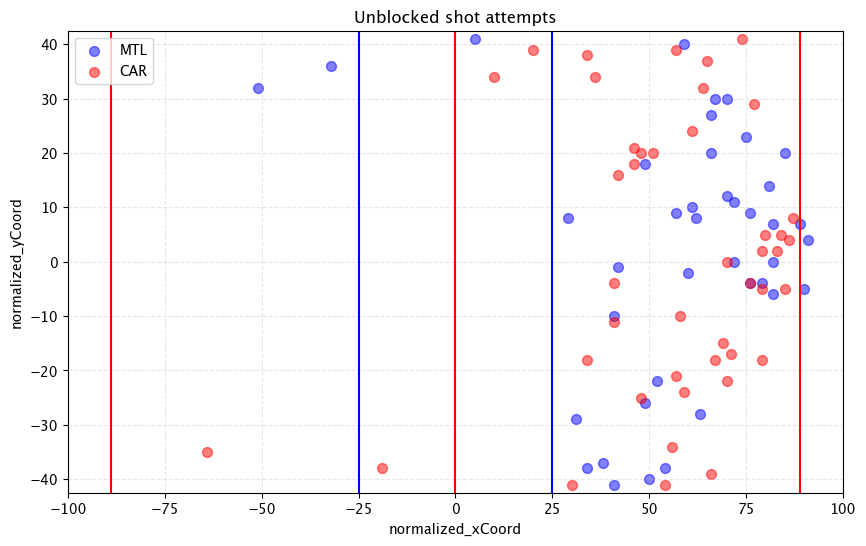

In [74]:
fenwicks = ['shot-on-goal','missed-shot', 'goal',]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
teams = ('MTL', 'CAR')
colors = ('blue', 'red')

ax.vlines(x = 25, color='blue', ymin=-42.5, ymax=42.5)
ax.vlines(x = -25, color='blue', ymin=-42.5, ymax=42.5)
ax.vlines(x = 0, color='red', ymin=-42.5, ymax=42.5)

ax.vlines(x = 89, color='red', ymin=-42.5, ymax=42.5)
ax.vlines(x = -89, color='red', ymin=-42.5, ymax=42.5)

ax.set_xlim(-100, 100)
ax.set_ylim(-42.5, 42.5)



for team, color in zip(teams, colors):
    df[df.eventTeam.notnull()].query('eventTeam == @team and event in @fenwicks').plot.scatter(x='normalized_xCoord', y='normalized_yCoord', ax=ax, alpha=0.5, color=color, label=team, s=50)

ax.legend(loc='upper left')
ax.set_title('Unblocked shot attempts ')
ax.grid(visible=True, alpha=0.3, linestyle='--')
plt.show()
# df.query('event in @fenwicks').plot.scatter(x='normalized_xCoord', y='normalized_yCoord', figsize=(10, 6), alpha=0.5)